## Load dataset

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.DESCR)
print(iris.data.shape)
print(iris.target.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Gaussian Mixture Model: Unsupervised Learning

In [6]:
# fit a Gaussian Mixture Model with 3 components
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## Display learned possibilities as a contour plot

In [7]:
import numpy as np

x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

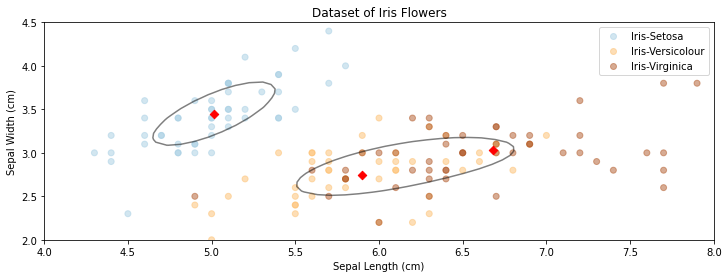

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 4]

CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
pl = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='red')  # probability peaks of the 3 components 
plt.ylabel("Sepal Width (cm)")
plt.xlabel("Sepal Length (cm)")
plt.title("Dataset of Iris Flowers")
plt.legend(handles=pl.legend_elements()[0], labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])